#  Climate Data Analysis with NASA POWER API
This notebook combines the workflows from **First Workshop** and **Second Workshop** into a single, cleaned step-by-step guide:

1. **Setup & Imports**
2. **Fetch Climate Data**
3. **Process & Analyze Data**
4. **Visualization**
5. **Export Results**

## 1. Setup & Imports

In [3]:
!pip install requests pandas matplotlib
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Fetch Climate Data
We will use the [NASA POWER API](https://power.larc.nasa.gov/) to fetch climate data.

Functions:
- `fetch_data`: Retrieve daily data (temperature, humidity, etc.) for a given location & date range.

In [9]:
def fetch_data(lat, lon, start, end, params="T2M"):
    """
    Fetch daily climate data from NASA POWER API.
    - lat, lon: coordinates
    - start, end: YYYYMMDD format
    - params: variable (e.g., T2M = 2m air temp, RH2M = relative humidity)
    """
    url = "https://power.larc.nasa.gov/api/temporal/daily/point"
    query = {
        "parameters": params,
        "start": start,
        "end": end,
        "latitude": lat,
        "longitude": lon,
        "format": "JSON",
        "community": "AG"
    }
    response = requests.get(url, params=query, timeout=15)
    response.raise_for_status()
    data = response.json()
    return data["properties"]["parameter"][params]


## 3. Process & Analyze Data
Convert raw dictionary data into a DataFrame and compute **monthly averages**.

In [5]:
def process_monthly_avg(data_dict):
    df = pd.DataFrame(list(data_dict.items()), columns=["date", "value"])
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)
    return df.resample("ME").mean()


## 4. Visualization
Plot the monthly averages to observe long-term climate trends.

In [6]:
def plot_monthly(df, title="Monthly Average Climate Variable"):
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df["value"], marker="o", linestyle="-")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()


## 5. Export Results
Save processed data into a CSV file for later use.

In [7]:
def save_csv(df, filename="monthly_avg.csv"):
    df.to_csv(filename)
    print(f"💾 Saved to {filename}")


##  Example Run: Alexandria (2010–2015)
We will fetch **temperature (T2M)** and **relative humidity (RH2M)** data.

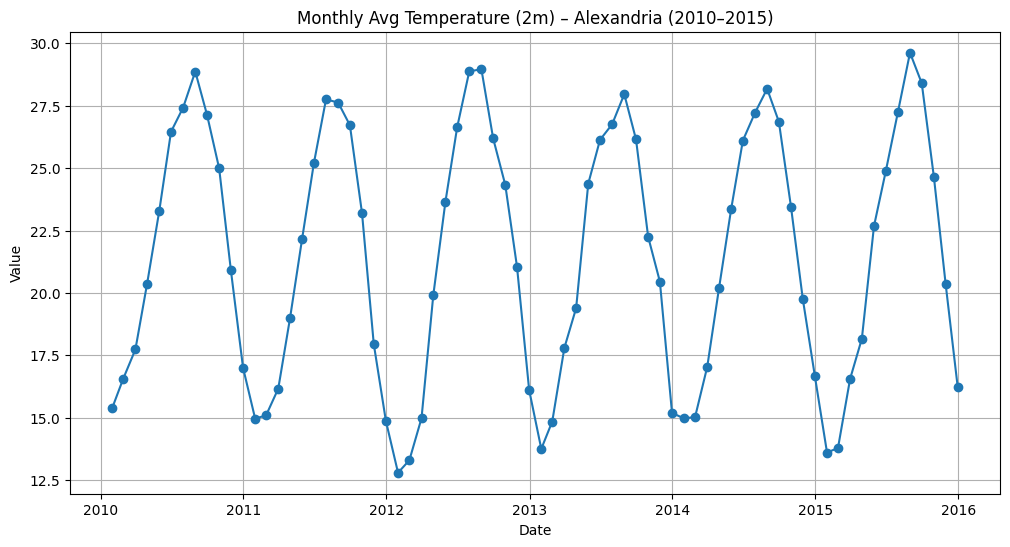

💾 Saved to alexandria_t2m_monthly.csv


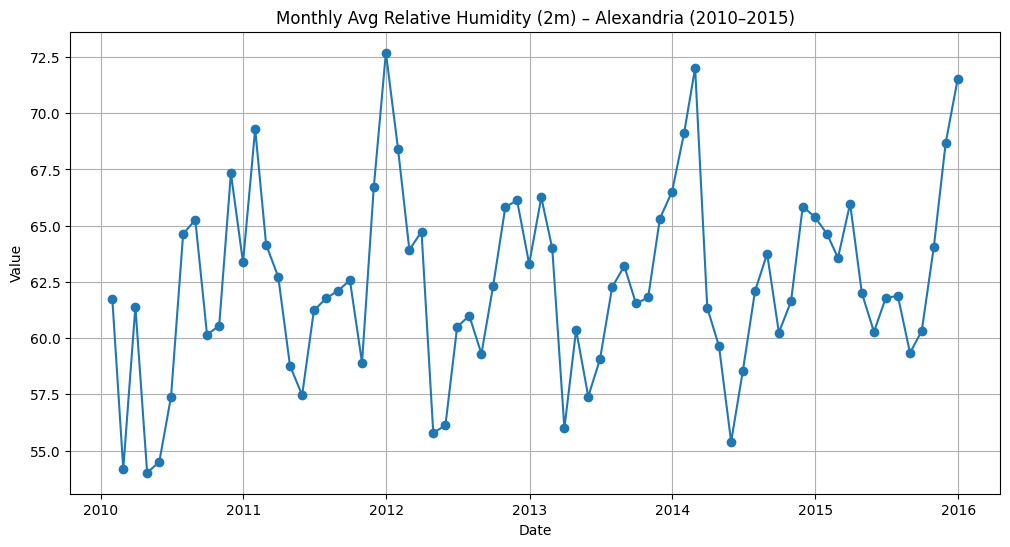

💾 Saved to alexandria_rh2m_monthly.csv


In [8]:
lat, lon = 31.2001, 29.9187  # Alexandria, Egypt

# Fetch Temperature (2010–2015)
t2m_data = fetch_data(lat, lon, "20100101", "20151231", params="T2M")
t2m_monthly = process_monthly_avg(t2m_data)
plot_monthly(t2m_monthly, title="Monthly Avg Temperature (2m) – Alexandria (2010–2015)")
save_csv(t2m_monthly, "alexandria_t2m_monthly.csv")

# Fetch Relative Humidity (2010–2015)
rh2m_data = fetch_data(lat, lon, "20100101", "20151231", params="RH2M")
rh2m_monthly = process_monthly_avg(rh2m_data)
plot_monthly(rh2m_monthly, title="Monthly Avg Relative Humidity (2m) – Alexandria (2010–2015)")
save_csv(rh2m_monthly, "alexandria_rh2m_monthly.csv")
